### Data Dictionary
| Field | Description | 
| ----------- | :---------: |
| CRIM|per capita crime rate by town| 
| ZN|proportion of residential land zoned for lots over 25,000 sq.ft.| 
| INDUS |proportion of non-retail business acres per town.|
|CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX|nitric oxides concentration (parts per 10 million)|
|RM|average number of rooms per dwelling|
|AGE|proportion of owner-occupied units built prior to 1940|
|DIS|weighted distances to five Boston employment centres|
|RAD|index of accessibility to radial highways|
|TAX|full-value property-tax rate per 10,000|
|PTRATIO|pupil-teacher ratio by town|
|LSTAT|lower status of the population|
|MEDV|Median value of owner-occupied homes in 1000s|

### Summary

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
boston_csv = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_csv)
# save the data frame to local directory
df = df.drop(index=[0, 1], axis=1)
df.to_csv('boston_housing.csv', index=False)

In [3]:
df = pd.read_csv('boston_housing.csv')
df
# drop index column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
3,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
4,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   ZN       504 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     504 non-null    float64
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      504 non-null    float64
 7   DIS      504 non-null    float64
 8   RAD      504 non-null    float64
 9   TAX      504 non-null    float64
 10  PTRATIO  504 non-null    float64
 11  LSTAT    504 non-null    float64
 12  MEDV     504 non-null    float64
dtypes: float64(13)
memory usage: 51.3 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,3.627796,11.373016,11.162361,0.069444,0.554898,6.283788,68.561111,3.792132,9.581349,408.789683,18.463095,12.675258,22.531746
std,8.615632,23.361404,6.860259,0.254461,0.116042,0.703867,28.200606,2.109202,8.709660,168.633955,2.164467,7.145309,9.215044
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.449000,5.884750,44.850000,2.097050,4.000000,279.000000,17.400000,6.990000,16.950000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.190950,5.000000,330.000000,19.100000,11.395000,21.200000
75%,3.681942,12.500000,18.100000,0.000000,0.624000,6.626000,94.100000,5.212575,24.000000,666.000000,20.200000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
3,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
4,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
500,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
501,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
502,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


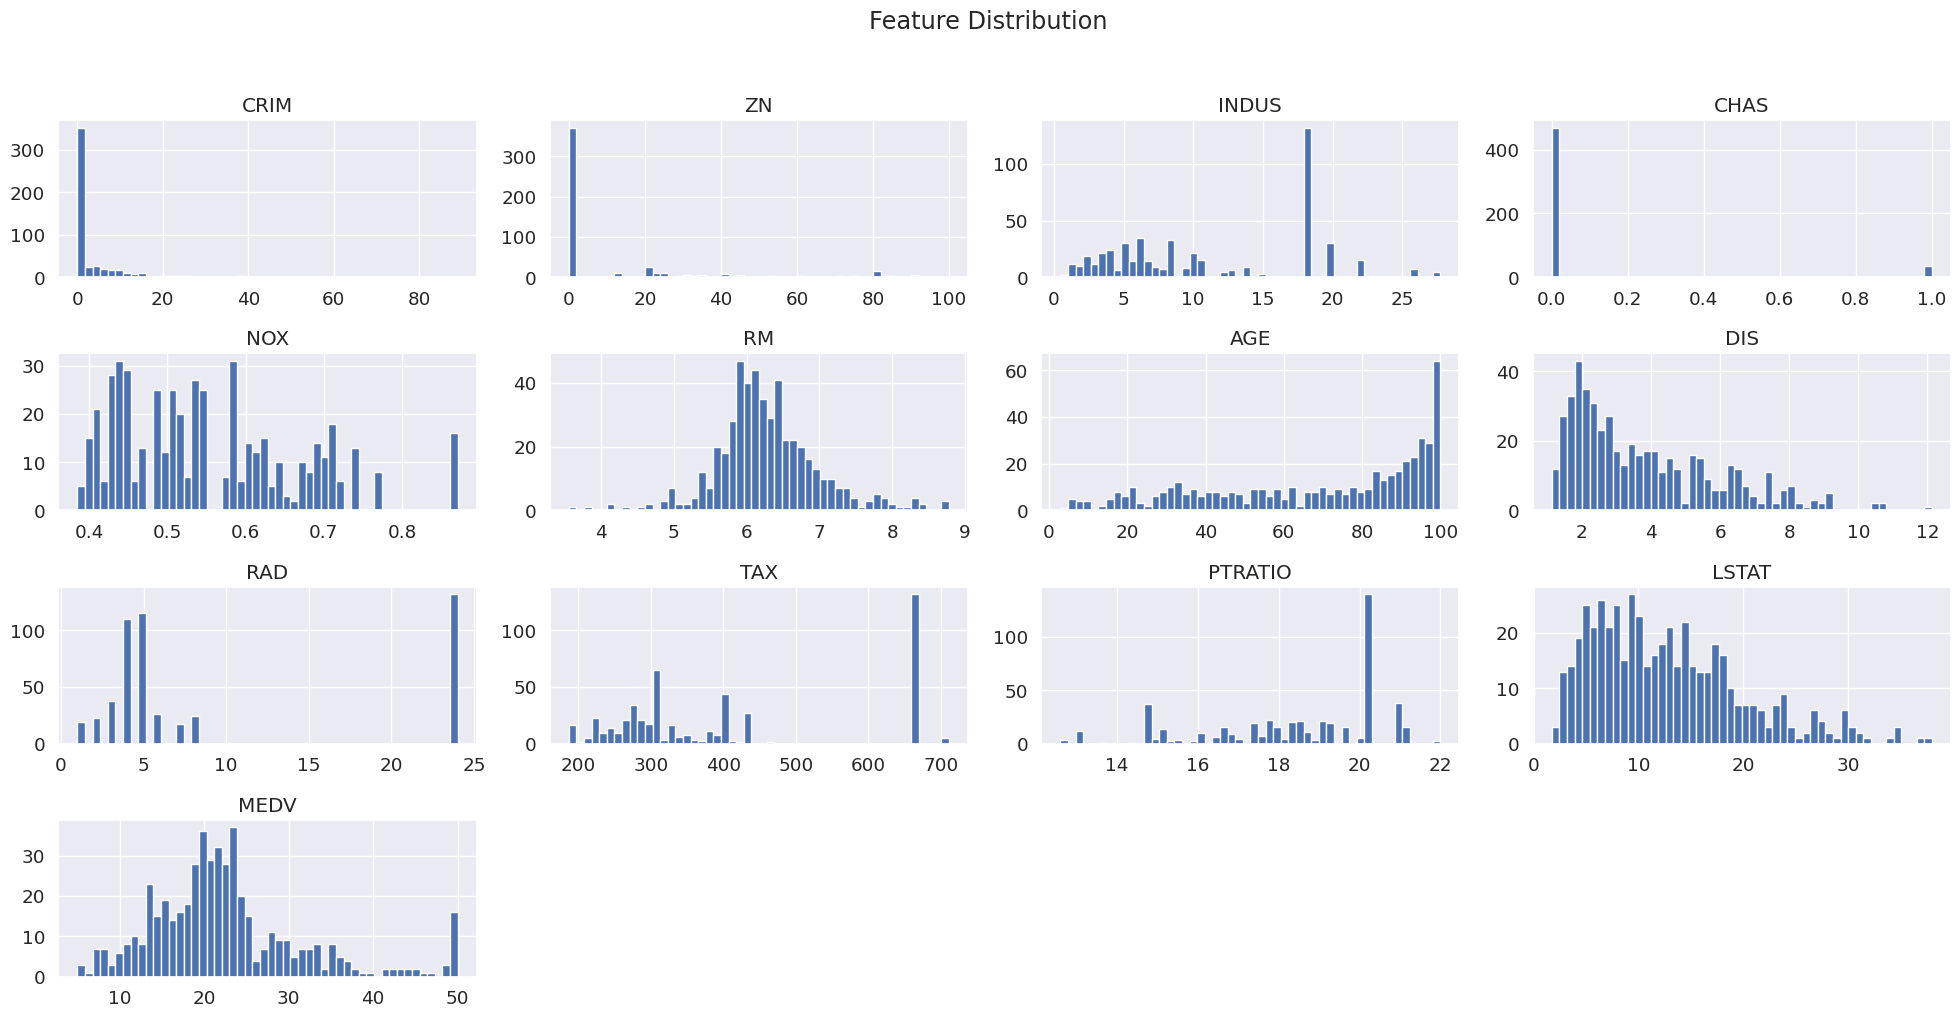

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

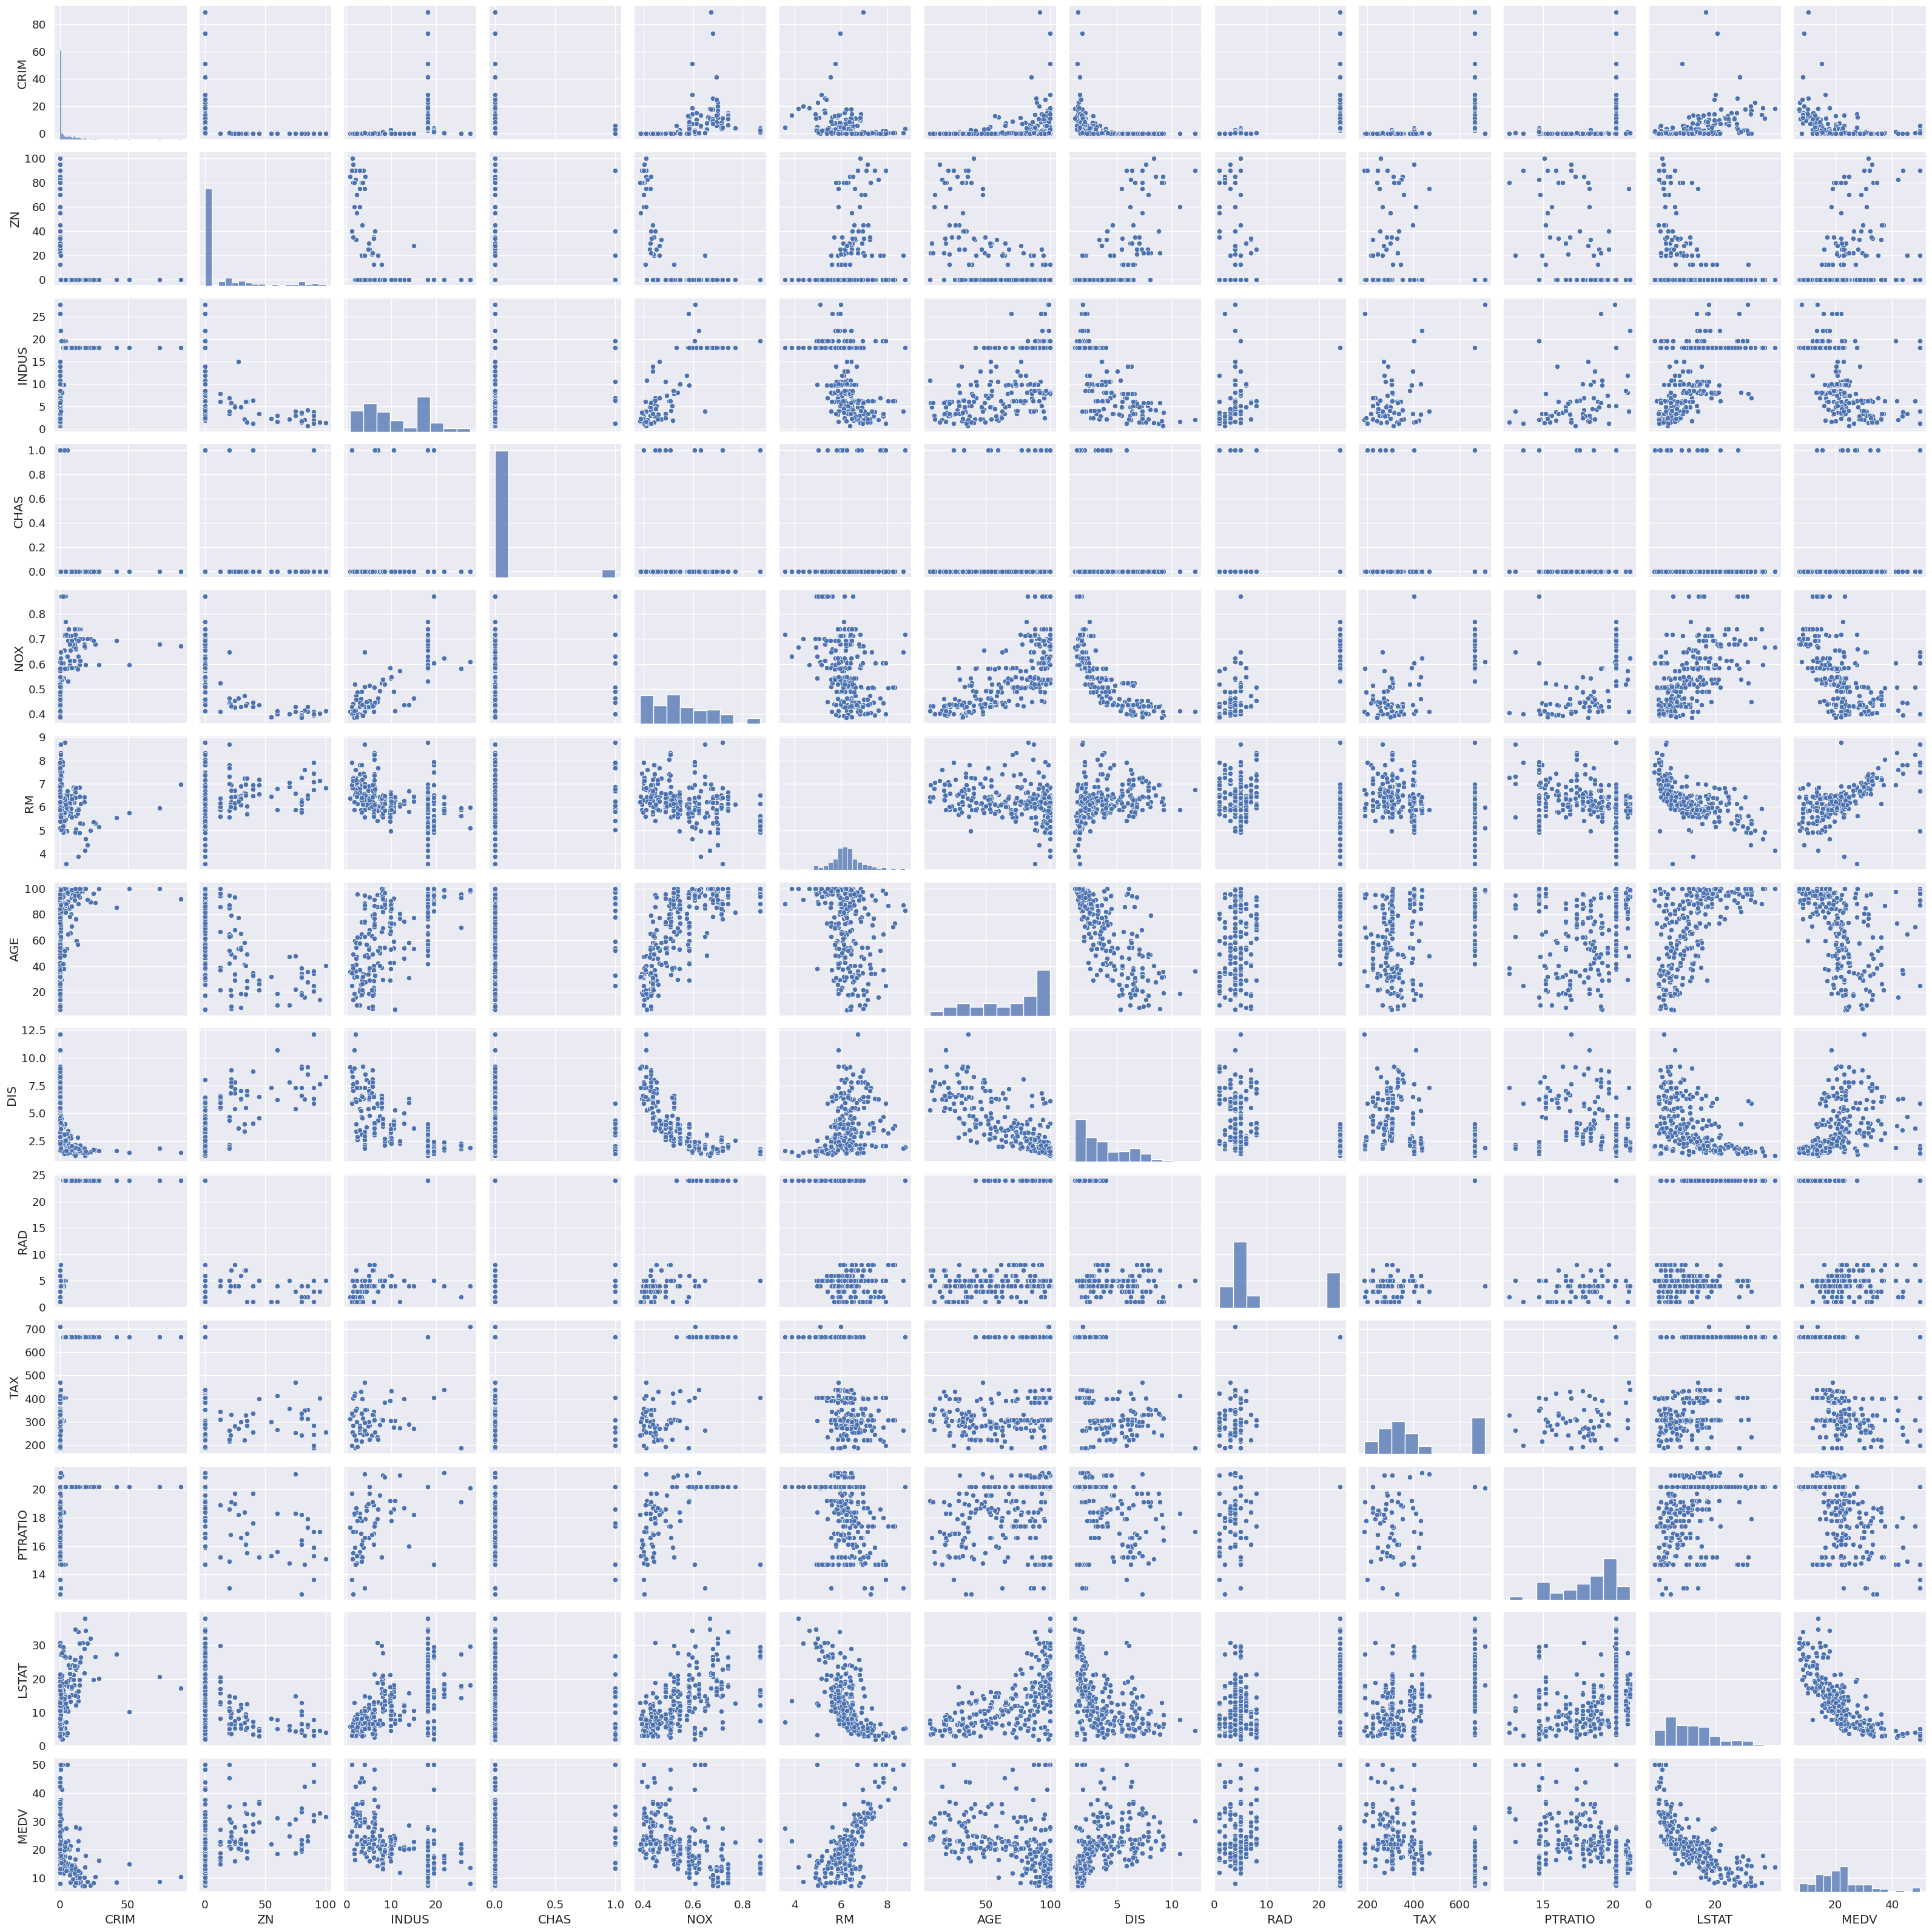

In [10]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df.sample(250))
plt.show()

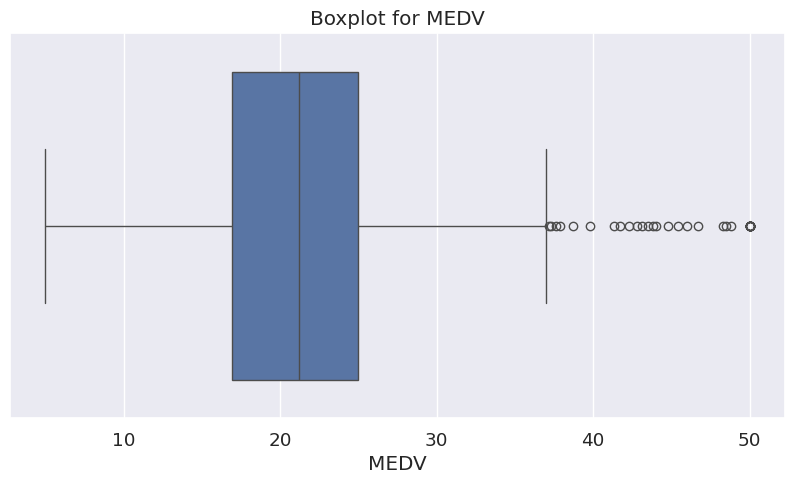

In [11]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

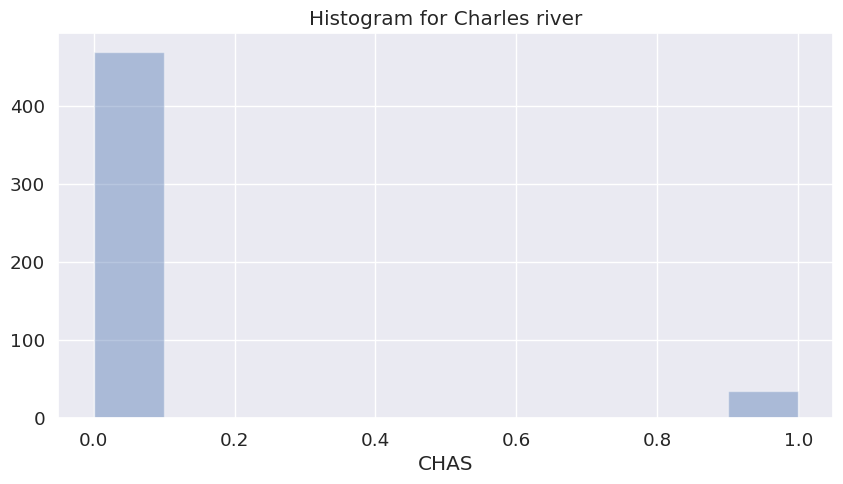

In [12]:
#Provide a histogram for the Charles river variable
plt.figure(figsize=(10,5))
sns.distplot(a=df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

In [13]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

df.loc[(df["AGE"] <= 35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"] >= 70),'age_group'] = '70 years and older'

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
3,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
4,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
500,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
501,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
502,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


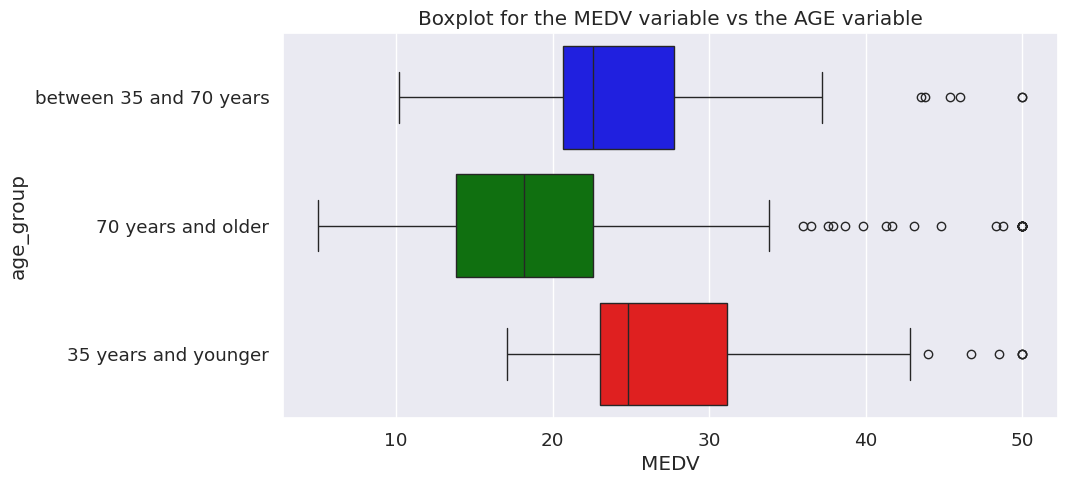

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV, y=df.age_group, data=df, palette=["blue", "green", "red"])
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

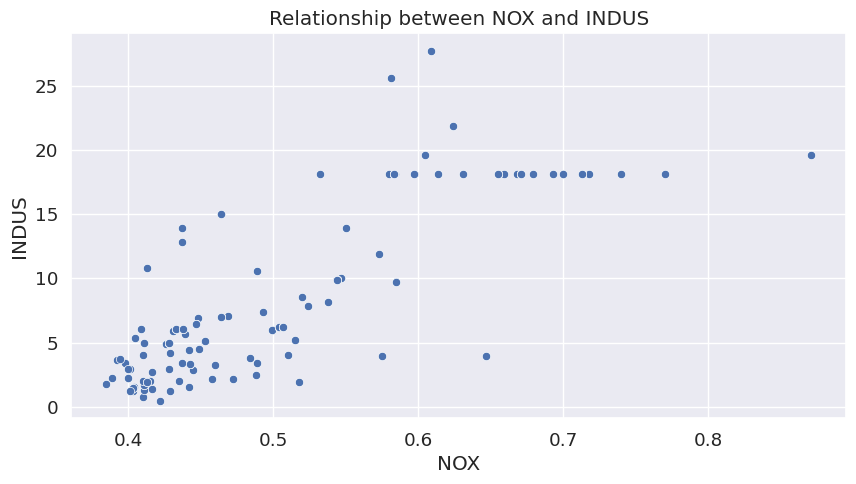

In [16]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(10,5))
sns.scatterplot(x=df.NOX, y=df.INDUS, data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

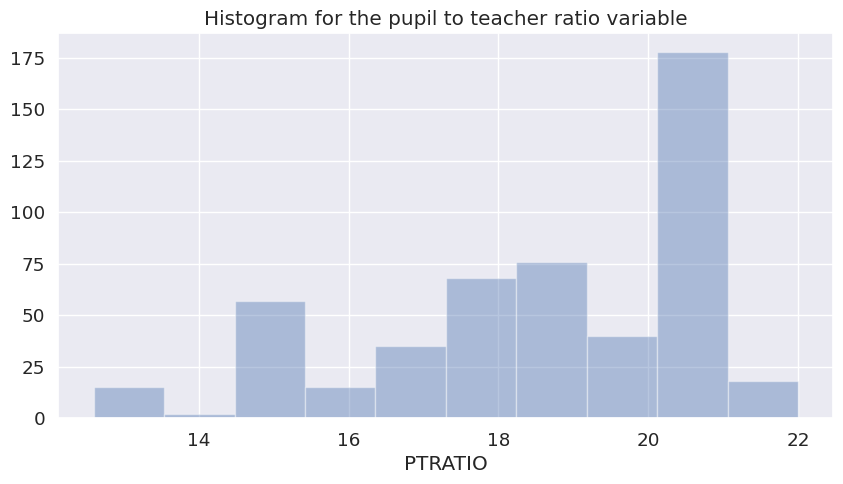

In [17]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
sns.distplot(a=df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
3,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
4,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
500,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
501,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
502,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [19]:
df["CHAS"].value_counts()

CHAS
0.0    469
1.0     35
Name: count, dtype: int64

In [20]:
a = df[df["CHAS"] == 0]["MEDV"]
a

0      34.7
1      33.4
2      36.2
3      28.7
4      22.9
       ... 
499    22.4
500    20.6
501    23.9
502    22.0
503    11.9
Name: MEDV, Length: 469, dtype: float64

In [21]:
b = df[df["CHAS"] == 1]["MEDV"]
b

140    13.4
150    15.3
152    17.0
153    15.6
158    27.0
160    50.0
161    50.0
206    24.4
207    20.0
208    21.7
209    19.3
210    22.4
214    23.3
216    21.5
217    23.0
218    26.7
219    21.7
220    27.5
232    29.0
234    25.1
267    20.7
271    35.2
272    32.4
274    33.2
275    33.1
280    46.0
281    50.0
354    17.8
355    21.7
356    22.7
361    16.8
362    21.9
367    50.0
368    50.0
370    50.0
Name: MEDV, dtype: float64

In [22]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.989991380675707, pvalue=7.592117925209625e-05, df=502.0)

In [23]:
df["AGE"].value_counts()

AGE
100.0    43
98.2      4
97.9      4
98.8      4
96.0      4
         ..
93.0      1
94.0      1
98.5      1
94.9      1
58.4      1
Name: count, Length: 355, dtype: int64

In [24]:
df.loc[(df["AGE"] <= 35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"] >= 70),'age_group'] = '70 years and older'

In [25]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
3,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
4,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
500,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
501,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
502,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [26]:
low = df[df["age_group"] == '35 years and younger']["MEDV"]
mid = df[df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = df[df["age_group"] == '70 years and older']["MEDV"]

In [27]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)

In [28]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.274719458055856, P-value=1.9379835629599707e-15


In [30]:
pearson,p_value = scipy.stats.pearsonr(df["NOX"],df["INDUS"])

In [31]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7643653868636197, P-value=9.844445062265527e-98


In [32]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group'], dtype='object')

In [33]:
y = df['MEDV']
x = df['DIS']

In [34]:
x = sm.add_constant(x)

In [35]:
results = sm.OLS(y,x).fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.49
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.26e-08
Time:                        09:52:51   Log-Likelihood:                -1817.7
No. Observations:                 504   AIC:                             3639.
Df Residuals:                     502   BIC:                             3648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3884      0.819     22.451      0.000      16.779      19.998
DIS            1.0926      0.189      5.787      0.000       0.722       1.464
==============================================================================
Omnibus:                      138.684   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.070
Skew:                           1.463   Prob(JB):                     4.20e-66
Kurtosis:                       5.404   Cond. No.                         9.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""